# <center>[Toxic Comment Classification Challenge](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge)<br>Capstone 3<br></center>
### <center>By Hector Cadeaux</center><br><br>
## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
import scikitplot as skplt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, f1_score, accuracy_score, recall_score, precision_score

In [3]:
corpus = pd.read_csv('train.csv')
corpus

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
corpus.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

<Axes: >

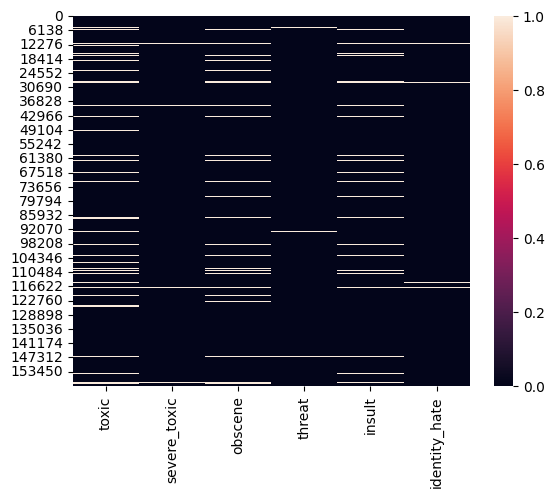

In [5]:
graph_df = corpus[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
sns.heatmap(graph_df)


{'toxic': 15294, 'severe_toxic': 1595, 'obscene': 8449, 'threat': 478, 'insult': 7877, 'identity_hate': 1405}


<BarContainer object of 6 artists>

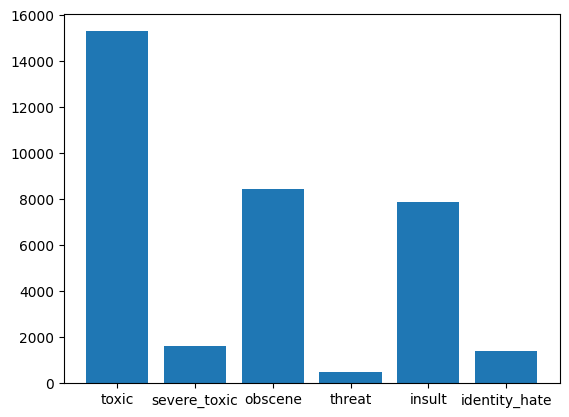

In [6]:
count_dict= dict()
for col in graph_df.columns:
    count_dict[col] = int(graph_df[col].sum())
print(count_dict)
plt.bar(count_dict.keys(),count_dict.values())

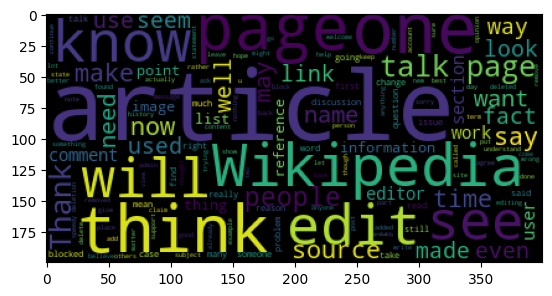

In [7]:
text =" ".join(corpus['comment_text'])
wordcloud = WordCloud()
wordcloud.generate(text)
plt.imshow(wordcloud)
plt.show()

In [8]:
def label_wc(label):
    df= corpus[corpus[label]!=0]
    text = " ".join(df['comment_text'].str.lower())
    wc= WordCloud()
    wc.generate(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    

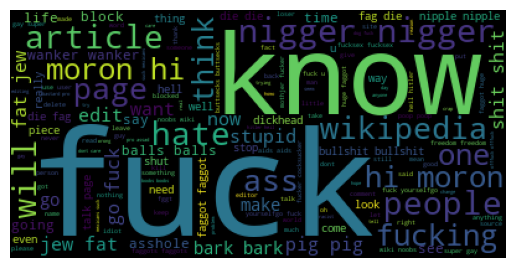

In [9]:
label_wc('toxic')

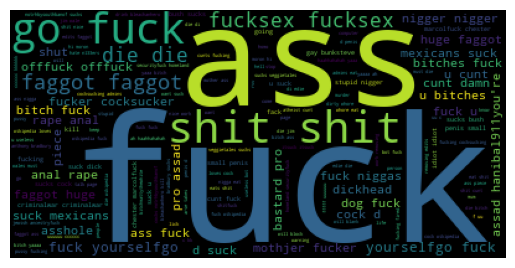

In [10]:
label_wc('severe_toxic')

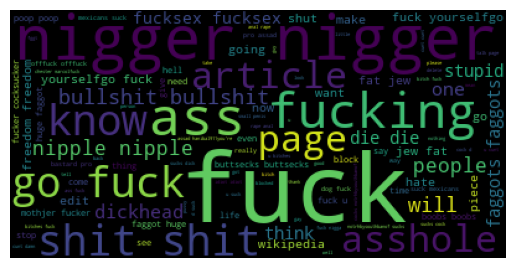

In [11]:
label_wc('obscene')

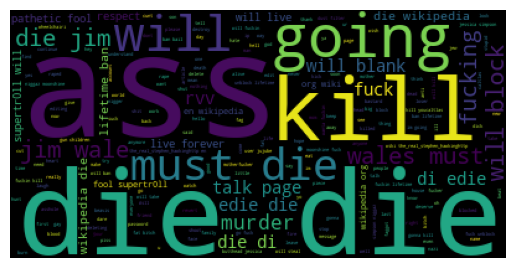

In [12]:
label_wc('threat')

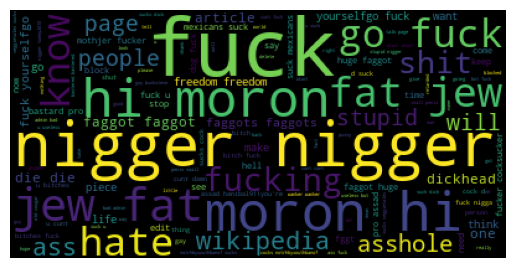

In [13]:
label_wc('insult')

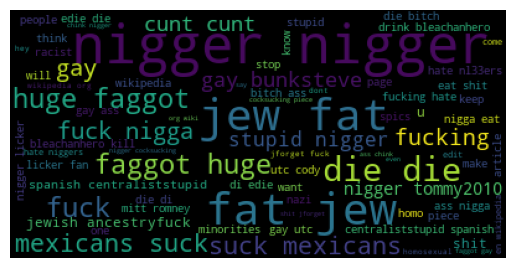

In [14]:
label_wc('identity_hate')

In [15]:
from sklearn.metrics import log_loss

In [16]:

y= corpus.drop(columns=['id','comment_text'])

from sklearn.model_selection import train_test_split

trainX, validX, trainy, validy = train_test_split(corpus[['comment_text']], y, test_size=.3, random_state=50)


In [17]:
tf_vec= TfidfVectorizer(input='content', analyzer='word',stop_words='english', ngram_range=(2,4))
tf_train = tf_vec.fit_transform(trainX['comment_text'].tolist())
tf_valid = tf_vec.transform(validX['comment_text'].tolist())

In [18]:
c_vec = CountVectorizer(input='content', analyzer='word',stop_words='english', ngram_range=(2,4))
c_train = c_vec.fit_transform(trainX['comment_text'].tolist())
c_valid = c_vec.transform(validX['comment_text'].tolist())

In [ ]:
def tf_model(modle):
    modle.fit(tf_train,trainy)
    mod_TT_pred = modle.predict(tf_train)
    print("Acurracy: ", accuracy_score(trainy,mod_TT_pred))
    print("Recall: ", recall_score(trainy,mod_TT_pred, average= 'weighted'))
    print("Precision: ",precision_score(trainy,mod_TT_pred, average= 'weighted'))
    print("Loss: ", log_loss(trainy,mod_TT_pred))
    print("f1-score: ", f1_score(trainy,mod_TT_pred, average='weighted'))  
    modle_v_pred = modle.predict(tf_valid)
    print("Valid Acurracy: ", accuracy_score(validy,modle_v_pred))
    print("Valid Recall: ", recall_score(validy,modle_v_pred, average= 'weighted'))
    print("Valid Precision: ",precision_score(validy,modle_v_pred, average= 'weighted'))
    print("Valid Loss: ", log_loss(validy,modle_v_pred))
    print("Valid f1-score: ", f1_score(validy,modle_v_pred,average='weighted'))

    # y_probas = modle.predict_proba(tf_valid) 
    # (ax1) =plt.subplots(1)
    
    # preds = y_probas[:,1]
    # fpr, tpr, threshold = roc_curve(validy, preds)
    # roc_auc = auc(fpr, tpr)

    # ax1=plt.title('Receiver Operating Characteristic')
    # ax1=plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    # ax1=plt.legend(loc = 'lower right')
    # ax1=plt.plot([0, 1], [0, 1],'r--')
    # ax0= skplt.metrics.plot_lift_curve(validy, y_probas)

    # y_pred_proba = modle.predict_proba(tf_train)

    # cuts = [.01*k for k in range(0,100)]
    # accuracy, f1, precision, recall = ([],[],[],[])
    # for thresholds in cuts:
    #     y_pred = [1 if y[1] >= thresholds else 0 for y in y_pred_proba]
    #     accuracy_scores = accuracy_score(y_pred, trainy,average='weighted')
    #     accuracy.append(accuracy_scores)
    #     f1_scores = f1_score(y_pred, trainy, average='weighted')
    #     f1.append(f1_scores)
    #     precision_scores = precision_score(y_pred, trainy, average='weighted')
    #     precision.append(precision_scores)
    #     recall_scores = recall_score(y_pred, trainy, average='weighted')
    #     recall.append(recall_scores)
    # cut_df = pd.DataFrame({
    # "accuracy":accuracy
    # ,"f1":f1
    # ,"precision":precision
    # ,"recall":recall
    # },index =cuts)
    # cmt = ""
    # for col in cut_df.columns:
    #     cmt += "Max {} of {} at {}\n".format(col,cut_df[col].max(),cut_df[col].idxmax())
    # cut_df.plot.line(title = cmt)
    # plt.show()

In [23]:
def count_model(modle):
    modle.fit(c_train,trainy)
    mod_TT_pred = modle.predict(c_train)
    print("Acurracy: ", accuracy_score(trainy,mod_TT_pred))
    print("Recall: ", recall_score(trainy,mod_TT_pred,averge='weighted'))
    print("Precision: ",precision_score(trainy,mod_TT_pred,averge='weighted'))
    print("Loss: ", log_loss(trainy,mod_TT_pred))
    print("f1-score: ", f1_score(trainy,mod_TT_pred,average='weighted'))  
    modle_v_pred = modle.predict(c_valid)
    print("Valid Acurracy: ", accuracy_score(validy,modle_v_pred))
    print("Valid Recall: ", recall_score(validy,modle_v_pred,averge='weighted'))
    print("Valid Precision: ",precision_score(validy,modle_v_pred,averge='weighted'))
    print("Loss: ", log_loss(trainy,modle_v_pred))
    print("Valid f1-score: ", f1_score(validy,modle_v_pred,average='weighted'))

    # y_probas = modle.predict_proba(c_valid) 
    # (ax1) =plt.subplots(1)
    
    # preds = y_probas[:,1]
    # fpr, tpr, threshold = roc_curve(validy, preds)
    # roc_auc = auc(fpr, tpr)

    # ax1=plt.title('Receiver Operating Characteristic')
    # ax1=plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    # ax1=plt.legend(loc = 'lower right')
    # ax1=plt.plot([0, 1], [0, 1],'r--')
    # ax0= skplt.metrics.plot_lift_curve(validy, y_probas)

    # y_pred_proba = modle.predict_proba(trainX)

    # cuts = [.01*k for k in range(0,100)]
    # accuracy, f1, precision, recall = ([],[],[],[])
    # for thresholds in cuts:
    #     y_pred = [1 if y[1] >= thresholds else 0 for y in y_pred_proba]
    #     accuracy_scores = accuracy_score(y_pred, trainy,average='weighted')
    #     accuracy.append(accuracy_scores)
    #     f1_scores = f1_score(y_pred, trainy,average='weighted')
    #     f1.append(f1_scores)
    #     precision_scores = precision_score(y_pred, trainy,average='weighted')
    #     precision.append(precision_scores)
    #     recall_scores = recall_score(y_pred, trainy,average='weighted')
    #     recall.append(recall_scores)
    # cut_df = pd.DataFrame({
    # "accuracy":accuracy
    # ,"f1":f1
    # ,"precision":precision
    # ,"recall":recall
    # },index =cuts)
    # cmt = ""
    # for col in cut_df.columns:
    #     cmt += "Max {} of {} at {}\n".format(col,cut_df[col].max(),cut_df[col].idxmax())
    # cut_df.plot.line(title = cmt)
    # plt.show()

In [21]:
#tf_model(DecisionTreeClassifier())

In [ ]:
tf_model(RandomForestClassifier(random_state=50,n_jobs=-1))

Acurracy:  0.9986750105193422


ValueError: Target is multilabel-indicator but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted', 'samples'].

In [24]:
count_model(RandomForestClassifier(random_state=50,n_jobs=-1))

In [ ]:
tf_model(MLPClassifier())

NameError: name 'tf_model' is not defined

### Preprocessing

In [15]:
corpus.iloc[10000,1]

"Hi RedRose and apologies for delay. Here is a draft of what I propose to present on the 'new section' pages.\nThe 6 volumes of Ultimate Allocations cover the 'reported' allocations of all British Railways: Steam  Diesel & Electric Locomotives on BR stock from 1950 - 1968 with additional information from 1948 where available. They are formatted in A4 comb bound volumes for ease of use. There are 3 main columns which are sub-divided with individual locomotive details including date when 'new' if appropriate. All 'reported' and published allocations and re-allocations combined with withdrawal dates where known are listed on either 'Weekly' - 'Monthly' - or 'Period Ending' dependant on regional variations at that time. A link to several testimonials and scanned images type of information provided can be found at www.ultimate-allocations.co.uk\nPlease advise if this information would be acceptable for presentation in the 'new section' you previously advised. I look forward to seeing your r

In [16]:
checking = corpus.sample(100)

In [17]:
checking.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [22]:
corpus['comment_text'].str.split(" ").str.len().max()

2273

#### SMOTE